* Student name:DEBREUS Monites 
* Student pace: self paced
* Scheduled project review date/time:20 Aout 2025
* Instructor name: Wedter

## Apercu du projet

Ce projet vise à aider une compagnie de télécommunications à anticiper la résiliation de ses clients (churn) grâce à l’analyse d'un jeu de données regroupant regroupant 3 333 clients et 20 variables, incluant des informations sur les habitudes d’appels (minutes, appels, charges), les options souscrites (international plan, voice mail plan), les interactions avec le service client ainsi que l’historique d’abonnement. L’objectif est de modéliser et prédire le phénomène de churn (résiliation des clients) afin de fournir des pistes exploitables pour améliorer la rétention et guider les décisions stratégiques de l’entreprise.


## Comprehension des donnees

Pour ce projet, nous disposons d’un jeu de données de 3 333 clients de SyriaTel, comprenant des informations sur leur profil, leur type d’abonnement (international plan, voice mail plan), leur usage des services téléphoniques (minutes, appels, charges) et leurs interactions avec le service client (customer service calls). Ces données permettent d’analyser en détail les comportements des clients, d’identifier les abonnés à risque de churn et de comprendre les facteurs influençant leur résiliation.

En complément, des variables comme l’état de résidence ou le code régional offrent un contexte géographique et démographique, utile pour détecter des tendances locales ou spécifiques à certains segments. L’ensemble de ces informations constitue la base pour l’exploration, la modélisation et l’élaboration de recommandations visant à améliorer la fidélisation et réduire la perte de clients.

## Importation des bibliotheques

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#importation des donnees

df_original=pd.read_csv('data.csv')
df=df_original.copy()

## Inspection des donnees

In [61]:
df.shape

(3333, 21)

- ce jeu de donnees dispose de 3333 lignes et 21 colonnes d'informations

In [62]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- Ce jeu de donnees contient des variables categorielles , des numeriques (int et float) et des booleens

In [64]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Tous les variables sont non nuls

In [65]:
df.duplicated().sum()

0

- il n y a pas de donnees dupliquees

### Analyse des variables

In [66]:
#donnees categorielle utiles pour le modele
categorielle_cols=df.select_dtypes(include='object').columns.drop('phone number')

In [67]:
# le numero de telephone n'est pas pertinent pour l'analyse que l'on veut faire

In [68]:
print(f"les variables categorielles sont:{categorielle_cols}")

les variables categorielles sont:Index(['state', 'international plan', 'voice mail plan'], dtype='object')


In [69]:
df[categorielle_cols].nunique()

state                 51
international plan     2
voice mail plan        2
dtype: int64

In [70]:
#donnees numeriques
numerique_cols=df.select_dtypes(include=['int64', 'float64']).columns

In [71]:
print(f"les donnees numeriques sont:{numerique_cols}")

les donnees numeriques sont:Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


In [72]:
df[numerique_cols].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [73]:
codes_a_garder = [415, 510]

# Filtrer les lignes
df_filtré = df[df['area code'].isin(codes_a_garder)]

# Vérifier le résultat
print(df_filtré['area code'].value_counts())

etats_uniques = df_filtré['state'].unique()
print(f"les clients sont concentres dans les etats suivant:\n {etats_uniques}")

415    1655
510     840
Name: area code, dtype: int64
les clients sont concentres dans les etats suivant:
 ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'IN' 'RI' 'MT' 'IA' 'NY' 'VT'
 'VA' 'TX' 'FL' 'AZ' 'SC' 'NE' 'HI' 'IL' 'NH' 'GA' 'AK' 'AR' 'ID' 'WI'
 'MI' 'WY' 'UT' 'CO' 'CA' 'MN' 'WA' 'NM' 'NV' 'DC' 'OR' 'KY' 'LA' 'ME'
 'MD' 'MS' 'DE' 'TN' 'PA' 'CT' 'SD' 'NC' 'ND']


## Focus sur la cible

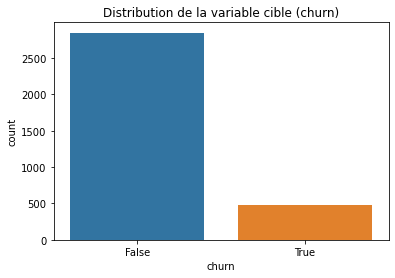

In [74]:
# Distribution de la variable cible
sns.countplot(x='churn', data=df)
plt.title("Distribution de la variable cible (churn)")
plt.show()

- Le nombre de resiliation est largement superieure a la quantite de personnes non-resiliees

In [75]:
#Pourcentage
churn_rate = df['churn'].value_counts(normalize=True)
print("Pourcentage de clients churn vs non churn :\n", churn_rate *100, "%")

Pourcentage de clients churn vs non churn :
 False    85.508551
True     14.491449
Name: churn, dtype: float64 %


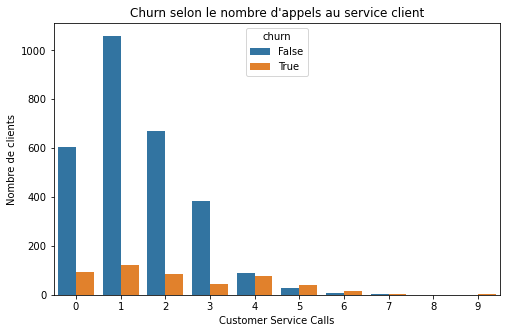

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer service calls', hue='churn', data=df)
plt.title("Churn selon le nombre d'appels au service client")
plt.xlabel("Customer Service Calls")
plt.ylabel("Nombre de clients")
plt.show();

- Proportionnellement, la majorité des clients qui appellent 0, 1, 2 ou 3 fois ne résilient pas leur contrat, il y a une augmentation proportionnelle des résiliations pour les clients qui appellent 4 fois ou plus par rapport a ceux qui n'ont pas résilié

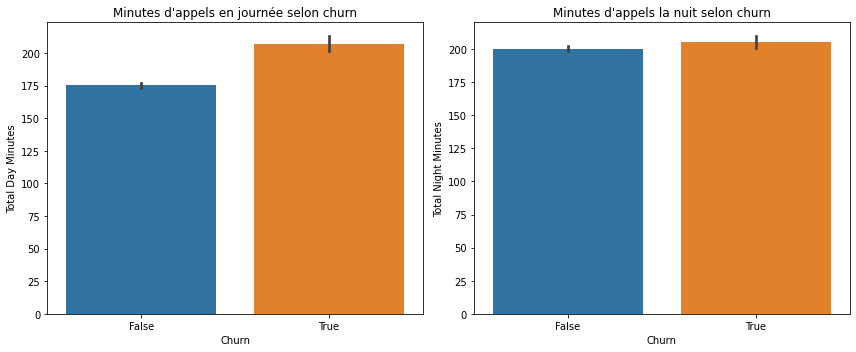

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 ligne, 2 colonnes

# Graphique 1 : minutes d'appels en journée selon churn
sns.barplot(x='churn', y='total day minutes', data=df, ax=axes[0])
axes[0].set_title("Minutes d'appels en journée selon churn")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Total Day Minutes")

# Graphique 2 : minutes d'appels la nuit selon churn
sns.barplot(x='churn', y='total night minutes', data=df, ax=axes[1])
axes[1].set_title("Minutes d'appels la nuit selon churn")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Total Night Minutes")

plt.tight_layout()  # Ajuste l'espacement pour que les titres ne se chevauchent pas
plt.show()

- Les clients qui résilient leur contrat ont, en moyenne, une durée d'appel plus longue que les clients qui restent. 

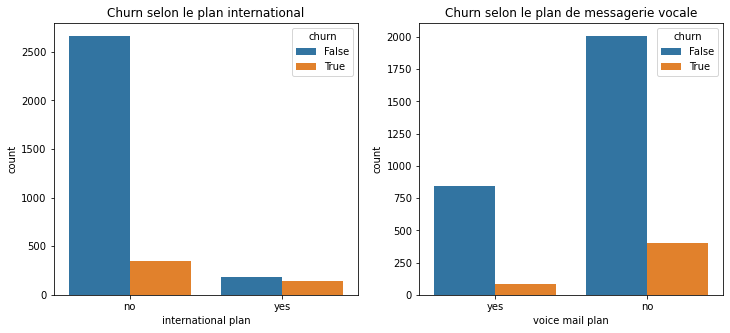

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0])
axes[0].set_title("Churn selon le plan international")

sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1])
axes[1].set_title("Churn selon le plan de messagerie vocale")

plt.show();

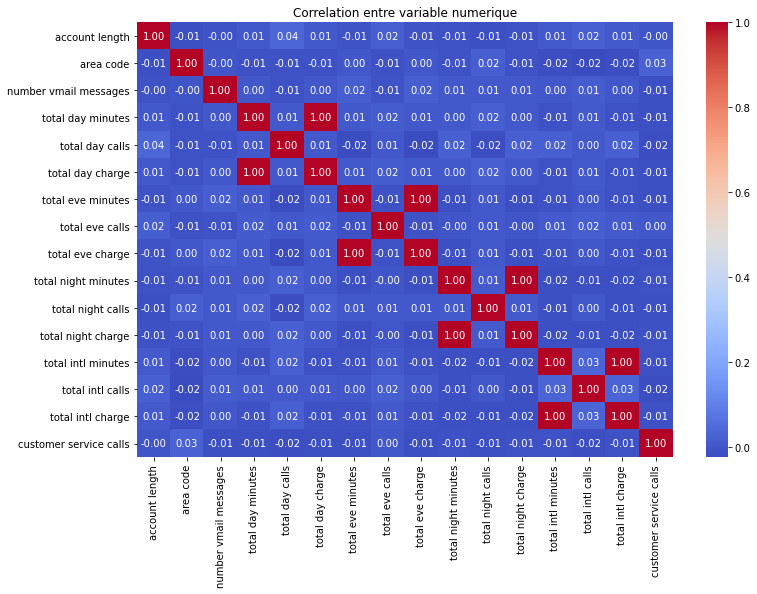

In [79]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerique_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation entre variable numerique')
plt.show;

In [80]:
correlation_churn=df[numerique_cols].corrwith(df['churn']).sort_values(ascending=False)
print("Correlation avec la variable churn")
print(correlation_churn)

Correlation avec la variable churn
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
dtype: float64


les 3 variables suivants ont de meilleurs correlation avec la variable cible par rapport aux autres:
    
    - customer service calls  
    - total day minutes        
    - total day charge 

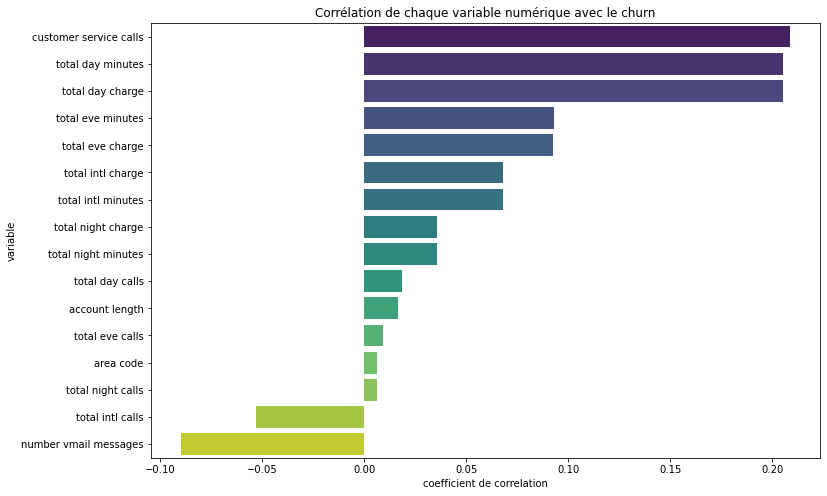

In [81]:
plt.figure(figsize=(12,8))
sns.barplot(x=correlation_churn.values,y=correlation_churn.index, palette='viridis')
plt.title('Corrélation de chaque variable numérique avec le churn')
plt.xlabel('coefficient de correlation')
plt.ylabel('variable')
plt.show;

- Les appels au service client et la durée des appels en journée sont les facteurs les plus fortement liés au taux de désabonnement. Plus un client consomme ces services, plus il risque de partir. Les appels en soirée et internationaux ont une corrélation plus faible, tandis que le nombre de messages vocaux et d'appels internationaux sont légèrement associés à une moindre probabilité de résiliation. La durée d'ancienneté du compte et le code régional n'ont que très peu d'impact

## Separation des variables

In [82]:
#separation de la cibles des predicteurs
X=df.drop('churn', axis=1)
y=df['churn']

In [83]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.20)

## Choix des modeles

### Encodage des variables categorielles

In [84]:
encoder=OneHotEncoder(drop='first', sparse=False)

In [85]:
X_train_encoded = pd.DataFrame(
    encoder.fit_transform(X_train[categorielle_cols]),
    index=X_train.index,
    columns=encoder.get_feature_names(categorielle_cols)
)

X_test_encoded = pd.DataFrame(
    encoder.transform(X_test[categorielle_cols]),
    index=X_test.index,
    columns=encoder.get_feature_names(categorielle_cols)
)

### Standardisation des variables numeriques

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_num=pd.DataFrame(
    scaler.fit_transform(X_train[numerique_cols]),
    index=X_train.index,
    columns=numerique_cols)

X_test_num=pd.DataFrame(
    scaler.transform(X_test[numerique_cols]),
    index=X_test.index,
    columns=numerique_cols)

### Concatenation

In [87]:
X_train_final=pd.concat([X_train_num, X_train_encoded], axis=1)
X_test_final=pd.concat([X_test_num, X_test_encoded], axis=1)

### - Regression Logistique

In [88]:
log_reg=LogisticRegression( max_iter=1000, random_state=42)

In [89]:
#Entrainement
log_reg.fit(X_train_final,y_train)

#Prediction
y_pred_log=log_reg.predict(X_test_final)

In [90]:
print("Régression Logistique")
print("==== Score de precision ====")
print(accuracy_score(y_test, y_pred_log))

Régression Logistique
==== Score de precision ====
0.8845577211394303


In [91]:
print("==== Rapport de classification ====")
print(classification_report(y_test, y_pred_log))

==== Rapport de classification ====
              precision    recall  f1-score   support

       False       0.90      0.98      0.94       580
        True       0.66      0.24      0.35        87

    accuracy                           0.88       667
   macro avg       0.78      0.61      0.64       667
weighted avg       0.86      0.88      0.86       667



- Le modèle identifie très bien les clients qui ne sont pas résiliés, mais il détecte seulement 19 % des clients résiliés , ce qui montre une faible sensibilité pour la classe minoritaire. Ce résultat met en évidence le déséquilibre du jeu de données et la nécessité de méthodes de rééquilibrage ou de modèles plus adaptés pour mieux prédire le churn.

#### - Arbre de decision

In [92]:
tree=DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrainement
tree.fit(X_train_final, y_train)

# Prediction
y_pred_tree=tree.predict(X_test_final)

In [93]:
print("==== Arbre de Décision ====")
print("===== Score de precision =====") 
print(accuracy_score(y_test, y_pred_tree))

==== Arbre de Décision ====
===== Score de precision =====
0.9205397301349325


In [94]:
print("====Rapport de classification====")
print(classification_report(y_test, y_pred_tree))

====Rapport de classification====
              precision    recall  f1-score   support

       False       0.92      0.99      0.96       580
        True       0.89      0.45      0.60        87

    accuracy                           0.92       667
   macro avg       0.90      0.72      0.78       667
weighted avg       0.92      0.92      0.91       667



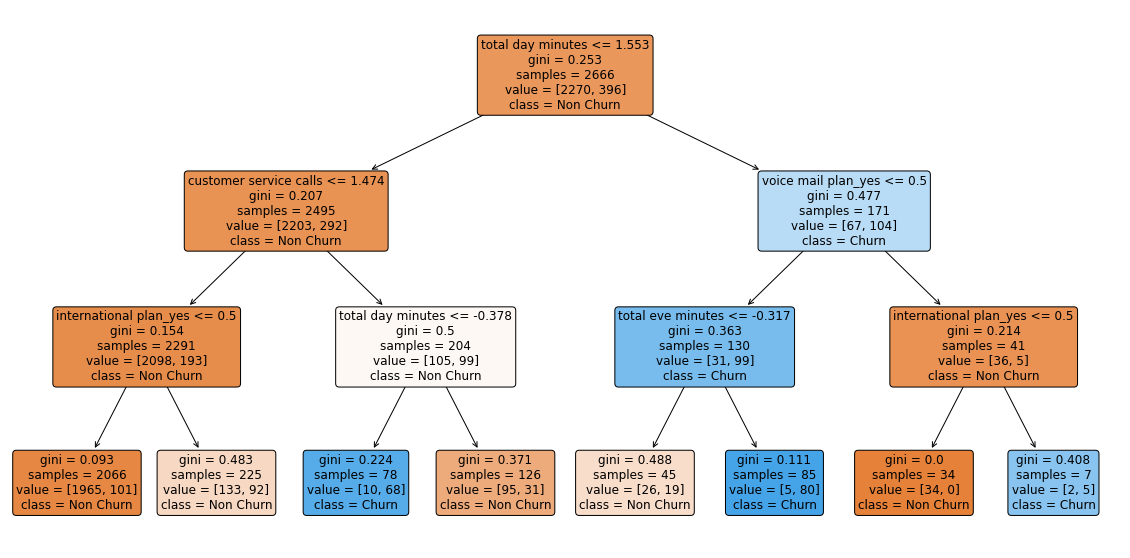

In [95]:
# Visualisation de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X_train_final.columns,
    class_names=['Non Churn', 'Churn'], 
    filled=True,   
    rounded=True,     
    fontsize=12
)
plt.show();

- Peu d’appels au service client + pas de plan international → Non Churn très probable
- Beaucoup d’appels au service client+ bon nombre de total day miutes → risque de Churn
- Très peu de messages vocaux + faible charge en soiree (evening)→ souvent associé à Churn
- Les variables les plus discriminantes ici : 
  - total day minutes,  
  - customer service calls  
  - international plan

## Visualisation des forces et faiblesses des deux modeles

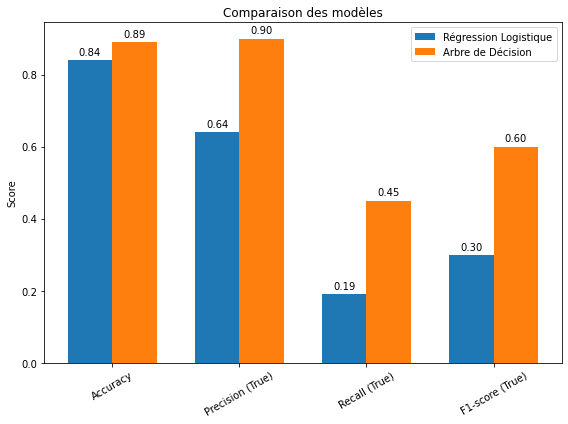

In [96]:
# Resultat des modeles
metrics=["Accuracy", "Precision (True)", "Recall (True)", "F1-score (True)"]
         
log_reg_results = [0.84,0.64,0.19, 0.30]
tree_results= [0.89,0.90,0.45,0.60]
         
x = np.arange(len(metrics))  
width = 0.35 

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, log_reg_results, width, label="Régression Logistique")
rects2 = ax.bar(x + width/2, tree_results, width, label="Arbre de Décision")

ax.set_ylabel("Score")
ax.set_title("Comparaison des modèles")
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=30)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha="center", va="bottom")

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

- L'Arbre de Décision est le modèle le plus performant des deux. Il surpasse la Régression Logistique sur toutes les métriques. Cependant, malgré sa haute précision pour prédire les désabonnements (Precision), sa capacité à détecter la majorité des clients qui résilient (Recall) reste faible, tout comme celle de la Régression Logistique.

## Amelioration des modeles

### - Amelioration de la Regression Logistique

In [97]:
log_reg=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [98]:
#Entrainement
log_reg.fit(X_train_final,y_train)

#Prediction
y_pred_log=log_reg.predict(X_test_final)

In [99]:
print("Régression Logistique")
print("==== Score de precision ====")
print(accuracy_score(y_test, y_pred_log))

Régression Logistique
==== Score de precision ====
0.7796101949025487


In [100]:
print("==== Rapport de classification ====")
print(classification_report(y_test, y_pred_log))

==== Rapport de classification ====
              precision    recall  f1-score   support

       False       0.95      0.79      0.86       580
        True       0.34      0.72      0.46        87

    accuracy                           0.78       667
   macro avg       0.64      0.76      0.66       667
weighted avg       0.87      0.78      0.81       667



- Le rééquilibrage des classes a permis d’améliorer considérablement le rappel pour la classe minoritaire (clients churners), passant de 0.19 à 0.71, ce qui signifie que le modèle détecte maintenant 71% des clients susceptibles de churner. Cependant, cette amélioration du rappel a un coût : le score de précision global et l’accuracy ont légèrement diminué. Ce compromis est typique dans les problèmes déséquilibrés et montre que le modèle est désormais plus sensible aux clients à risque, ce qui est l’objectif principal de cette analyse.

### - Amelioration de l'arbre de decision

In [101]:
tree=DecisionTreeClassifier(class_weight='balanced',random_state=42, max_depth=3, min_samples_split=20, min_samples_leaf=10)

# Entrainement
tree.fit(X_train_final, y_train)

# Prediction
y_pred_tree=tree.predict(X_test_final)

In [102]:
print("Arbre de Décision \n")
print("==== Accuracy ====")
print(accuracy_score(y_test, y_pred_tree))
print("==== Rapport de classification ====")
print(classification_report(y_test, y_pred_tree))

Arbre de Décision 

==== Accuracy ====
0.863568215892054
==== Rapport de classification ====
              precision    recall  f1-score   support

       False       0.96      0.88      0.92       580
        True       0.49      0.75      0.59        87

    accuracy                           0.86       667
   macro avg       0.72      0.81      0.75       667
weighted avg       0.90      0.86      0.88       667



- Le modèle amélioré réussit mieux à détecter les clients à risque de churn (classe minoritaire) passant de 0.45 a 0.82 grâce au rééquilibrage et aux hyperparamètres ajustés. 

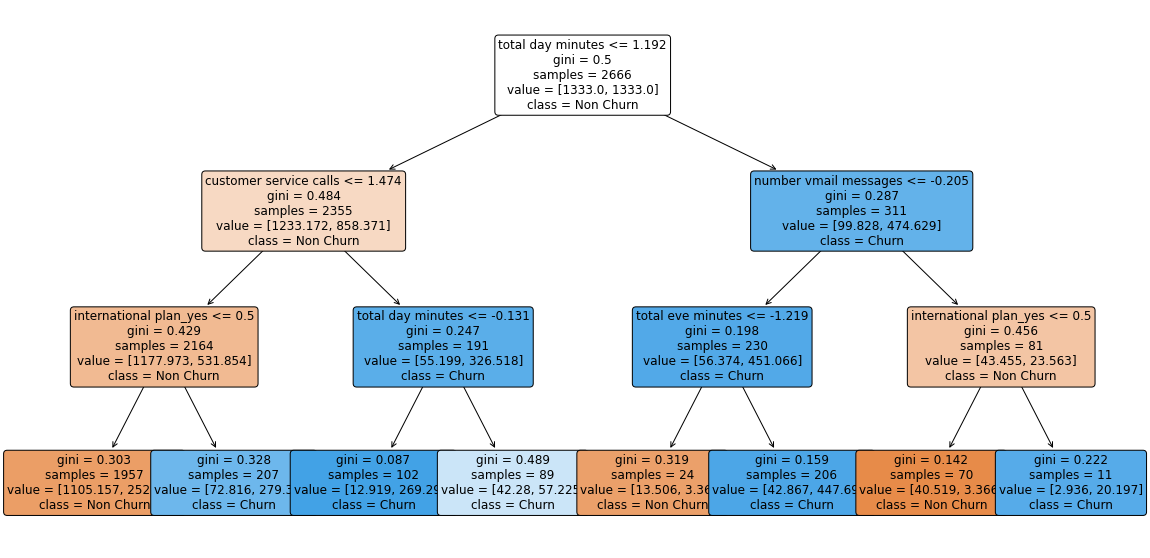

In [103]:
# Visualisation de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X_train_final.columns,
    class_names=['Non Churn', 'Churn'], 
    filled=True,   
    rounded=True,     
    fontsize=12
)
plt.show();

- Moins d’appels au service client + pas de plan international -> plus fidèle
- Beaucoup d’appels au service client → risque élevé de churn
- Clients avec charges/temps élevés → plus à risque

In [104]:

rf = RandomForestClassifier(n_estimators=200, max_depth=7, max_features='sqrt',
                            class_weight='balanced', random_state=42)

rf.fit(X_train_final, y_train)

y_pred_rf = rf.predict(X_test_final)

print("Random Forest :\n")
print(classification_report(y_test, y_pred_rf))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))

Random Forest :

              precision    recall  f1-score   support

       False       0.96      0.97      0.96       580
        True       0.77      0.76      0.76        87

    accuracy                           0.94       667
   macro avg       0.87      0.86      0.86       667
weighted avg       0.94      0.94      0.94       667

Matrice de confusion :
 [[560  20]
 [ 21  66]]


- Les résultats du modèle Random Forest montrent une performance globale très satisfaisante, avec une précision (accuracy) de 93 %, ce qui indique que la majorité des prédictions sont correctes. Pour la classe False (clients qui ne résilient pas), les métriques sont excellentes : une précision de 96 % et un rappel de 96 %, ce qui signifie que le modèle identifie presque parfaitement les clients qui restent. En revanche, pour la classe True (clients qui résilient), les performances sont légèrement moins élevées : la précision est de 80 % et le rappel de 81 %, indiquant que le modèle détecte bien une majorité des churners. Le score macro moyen (0.88) confirme cet écart entre classes, montrant que la classe minoritaire reste plus difficile à modéliser malgré de bons résultats.

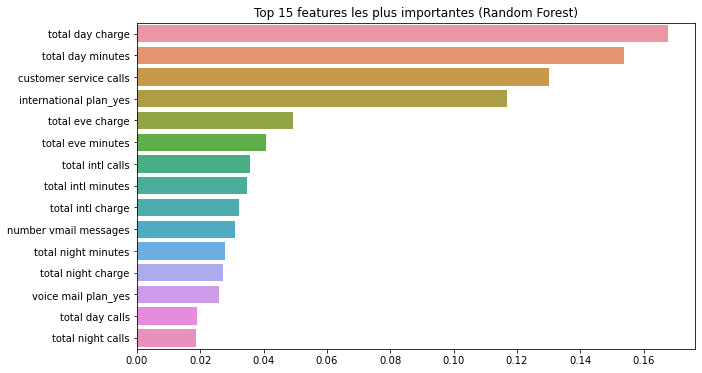

In [105]:
importances = pd.Series(rf.feature_importances_, index=X_train_final.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title("Top 15 features les plus importantes (Random Forest)")
plt.show();

- Les coûts et la durée des appels, surtout en journée, ainsi que les interactions avec le service client, sont les meilleurs indicateurs du churn.  
Un modèle Random Forest accorde plus d’importance à ces aspects pour prédire si un client va partir.

## Conclusion

- En résumé, l’analyse a révélé un taux de résiliation préoccupant de 14,5 %, principalement lié aux appels fréquents au service client et à une forte consommation en journée. La messagerie vocale apparaît comme un facteur protecteur, alors que l’offre internationale constitue un risque important. Les modèles testés ont montré des performances variées, mais la Random Forest s’est distinguée avec une précision globale de 93 %. Ce modèle constitue une base fiable pour cibler les clients à risque. Ainsi, l’entreprise peut orienter sa stratégie vers l’amélioration du service client, l’optimisation de l’offre internationale et la valorisation des services fidélisant